In [2]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [4]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

In [5]:
events['person'].isnull().value_counts()

False    1011288
Name: person, dtype: int64

In [6]:
events['event'].value_counts() 

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [7]:
# person_model = events.loc[(events['event'] == 'viewed product') | (events['event'] == 'brand listing') ,['timestamp','event','person','sku','model','skus']]
# person_model.groupby('person').head()

In [8]:
# person_model = events.loc[(events['event'] == 'viewed product') | (events['event'] == 'brand listing') ,['timestamp','event','person','sku','model','skus']]
# person_model.groupby('person').head()
# events.loc[events['event'] == 'visited site']

# Visitas desde los dispositivos

In [9]:
total_device_month = events.loc[:, ['device_type','timestamp']]
total_device_month['timestamp'] = total_device_month['timestamp'].dt.month
total_device_month['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

## Despreciamos los unknown ya que son muy pocos


In [21]:
total_device_month = events.loc[(events['device_type']  == 'Smartphone') | (events['device_type']  == 'Computer') | (events['device_type']  == 'Tablet'), ['person','device_type','timestamp']]
total_device_month['timestamp'] = total_device_month['timestamp'].dt.month
mobile_month = events.loc[(events['device_type']  == 'Smartphone') | (events['device_type']  == 'Tablet'), ['timestamp']]
computer_month = events.loc[events['device_type']  == 'Computer', ['timestamp']]
computer_month['timestamp'] = computer_month['timestamp'].dt.month
mobile_month['timestamp'] = mobile_month['timestamp'].dt.month
mobile_month['timestamp'].value_counts()

5    20834
6    12023
4     6232
3     3706
2     1472
1     1206
Name: timestamp, dtype: int64

In [22]:
computer_month['timestamp'].value_counts()

5    19241
6    10365
4     6398
3     3541
2     1318
1      927
Name: timestamp, dtype: int64

In [23]:
total_device_month['timestamp'].value_counts()

5    40075
6    22388
4    12630
3     7247
2     2790
1     2133
Name: timestamp, dtype: int64

In [24]:
months_cantidad = pd.DataFrame({'total':total_device_month['timestamp'].value_counts(),'mobile':mobile_month['timestamp'].value_counts(),'computer':computer_month['timestamp'].value_counts()})
months_cantidad['mobile'] = months_cantidad['mobile']/months_cantidad['total'] * 100
months_cantidad['computer'] = months_cantidad['computer']/months_cantidad['total'] * 100
months_cantidad.sort_index(ascending= False, inplace= True)
months_cantidad.drop('total',axis='columns',inplace = True)
months_cantidad

,mobile,computer
6,53.702877,46.297123
5,51.987523,48.012477
4,49.342835,50.657165
3,51.138402,48.861598
2,52.759857,47.240143
1,56.540084,43.459916


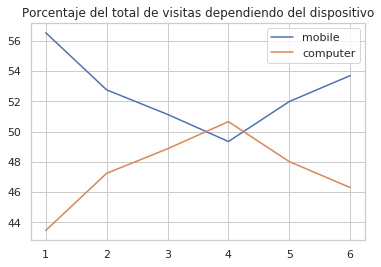

In [25]:
g = months_cantidad.plot()
g.set_title('Porcentaje del total de visitas dependiendo del dispositivo');

In [39]:
total_device_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87263 entries, 1 to 1011284
Data columns (total 3 columns):
person         87263 non-null object
device_type    87263 non-null object
timestamp      87263 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [48]:
mobile_month_person = events.loc[(events['device_type']  == 'Smartphone') | (events['device_type']  == 'Tablet'), ['person']]
computer_month_person = events.loc[events['device_type']  == 'Computer', ['person']]

events_mobile = events.loc[(events['person'].isin(mobile_month_person['person'])),['person','event']]
events_computer = events.loc[(events['person'].isin(computer_month_person['person'])),['person','event']]

In [52]:
events_device = pd.DataFrame({'mobile': events_mobile['event'].value_counts(),'computer': events_computer['event'].value_counts()})
events_device

,mobile,computer
ad campaign hit,49216,39648
brand listing,37566,73710
checkout,18753,16215
conversion,658,754
generic listing,41811,34655
lead,269,310
search engine hit,32396,23225
searched products,40911,20867
staticpage,2188,2261
viewed product,229119,355515


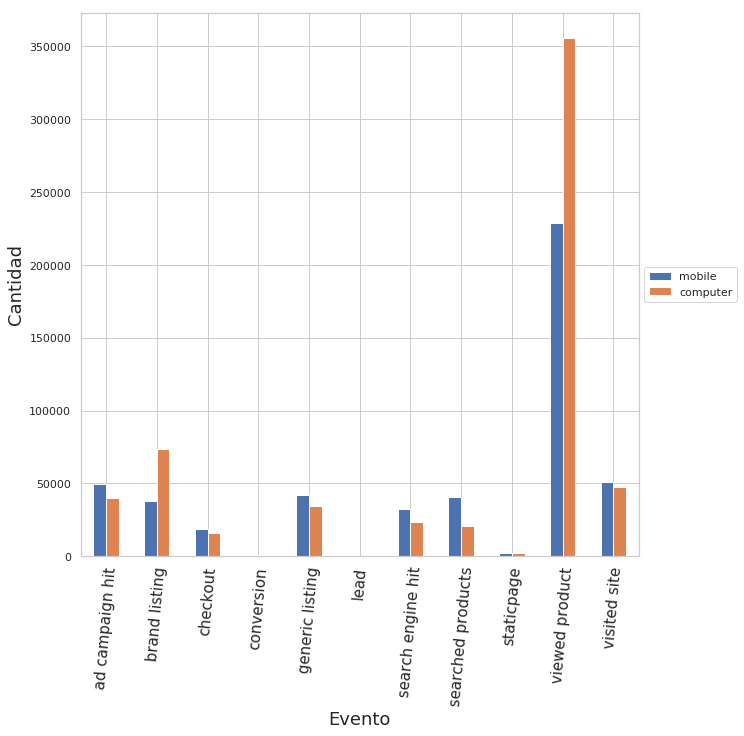

In [82]:
events_device_plot = events_device.plot.bar(figsize=(10,10))
events_device_plot.set_ylabel('Cantidad',fontsize = 18)
events_device_plot.set_xlabel('Evento',fontsize = 18)
events_device_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
events_device_plot.set_xticklabels(events_device_plot.get_xticklabels(), rotation = 85, fontsize = 15);

In [75]:
conversion_checkout_mobile = events_mobile.loc[(events_mobile['event'] == 'checkout') | (events_mobile['event'] == 'conversion'),:]
conversion_checkout_computer = events_computer.loc[(events_computer['event'] == 'checkout') | (events_computer['event'] == 'conversion'),:]

conversion_checkout_total =  pd.DataFrame({'mobile': conversion_checkout_mobile['event'].value_counts(),'computer': conversion_checkout_computer['event'].value_counts()})
conversion_checkout_total = conversion_checkout_total[conversion_checkout_total['mobile'] != 0] #Borro las filas que tienen 0 me quedo solo con onversion y checkout

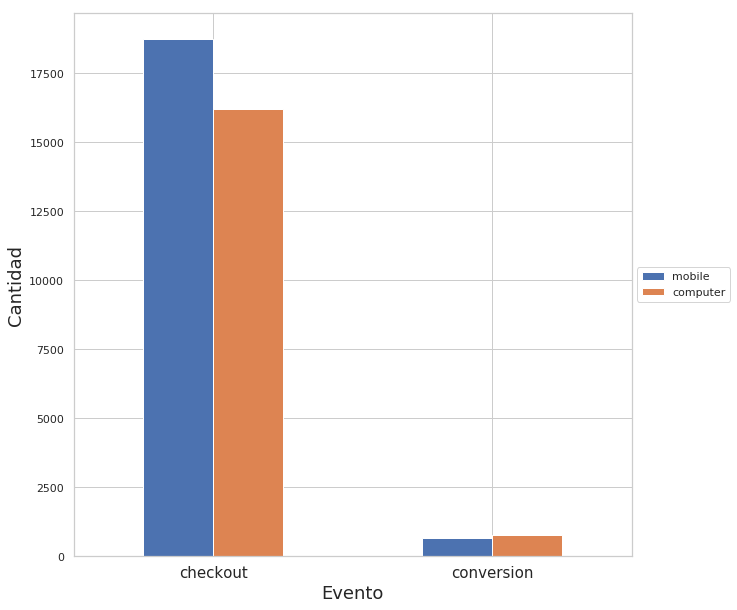

In [77]:
conversion_checkout_total_plot = conversion_checkout_total.plot.bar(figsize=(10,10))
conversion_checkout_total_plot.set_ylabel('Cantidad',fontsize = 18)
conversion_checkout_total_plot.set_xlabel('Evento',fontsize = 18)
conversion_checkout_total_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
conversion_checkout_total_plot.set_xticklabels(conversion_checkout_total_plot.get_xticklabels(), rotation = 0, fontsize = 15);

# Arranca part de conversion, cambiando cosas del notebook que era de checkouts

In [14]:
conversion = events.loc[events['event'] == 'conversion',['timestamp', 'person','model','condition','storage','color']]
conversion.head()

,timestamp,person,model,condition,storage,color
220,2018-03-20 17:46:12,00204059,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,2018-04-26 22:28:53,00c13dee,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,2018-06-10 14:37:50,00fdbb4b,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,2018-03-16 13:50:25,0146a9df,iPhone 5s,Bom,32GB,Cinza espacial
6985,2018-02-09 22:07:07,01db2fe6,Samsung Galaxy J5,Bom,16GB,Preto


In [15]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 220 to 1008943
Data columns (total 6 columns):
timestamp    1172 non-null datetime64[ns]
person       1172 non-null object
model        1172 non-null object
condition    1172 non-null object
storage      1172 non-null object
color        1172 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 64.1+ KB


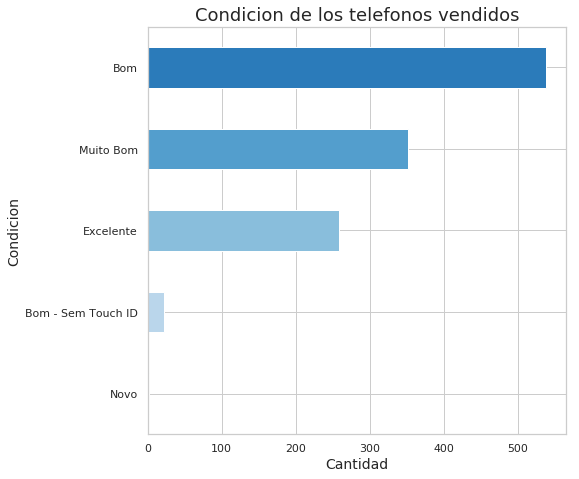

In [16]:
condition_plot = conversion['condition'].value_counts().sort_values(ascending = True).plot.barh(figsize = (7.5,7.5), color=sns.color_palette('Blues'))
# conversion_condicion = pd.DataFrame({'cantidad':conversion['condition'].value_counts()})
# condition_plot = sns.barplot(y = conversion_condicion.index, x = conversion_condicion['cantidad'])
condition_plot.set_title('Condicion de los telefonos vendidos',fontsize = 18)
condition_plot.set_ylabel('Condicion',fontsize = 14)
condition_plot.set_xlabel('Cantidad',fontsize = 14);

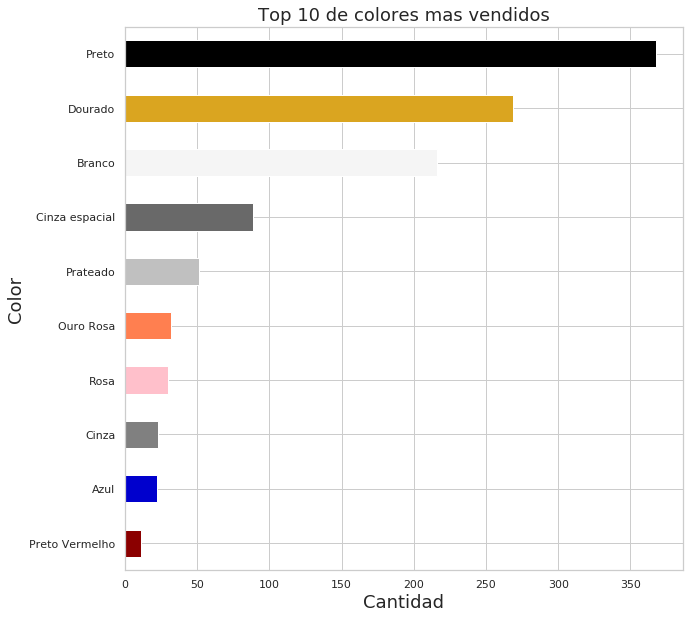

In [17]:
colores = ['#8B0000','#0000CD','#808080','#FFC0CB','#FF7F50','#C0C0C0','#696969','#F5F5F5','#DAA520','#000000']
color_plot = conversion['color'].value_counts().head(10).sort_values().plot.barh(figsize = (10,10), color = sns.color_palette(colores))
color_plot.set_title('Top 10 de colores mas vendidos',fontsize = 18)
color_plot.set_ylabel('Color',fontsize = 18)
color_plot.set_xlabel('Cantidad',fontsize = 18);

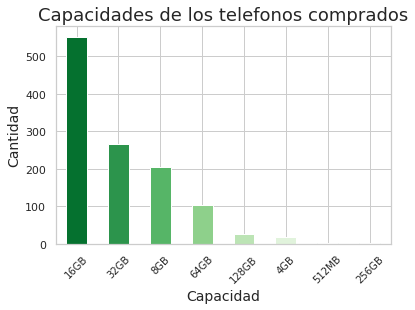

In [18]:
storage_plot = conversion['storage'].value_counts().plot(kind = 'bar' , color=sns.color_palette('Greens_r'))
storage_plot.set_title('Capacidades de los telefonos comprados',fontsize = 18)
storage_plot.set_xlabel('Capacidad',fontsize = 14)
storage_plot.set_ylabel('Cantidad',fontsize = 14)
storage_plot.set_xticklabels(storage_plot.get_xticklabels(), rotation = 45, fontsize = 10);

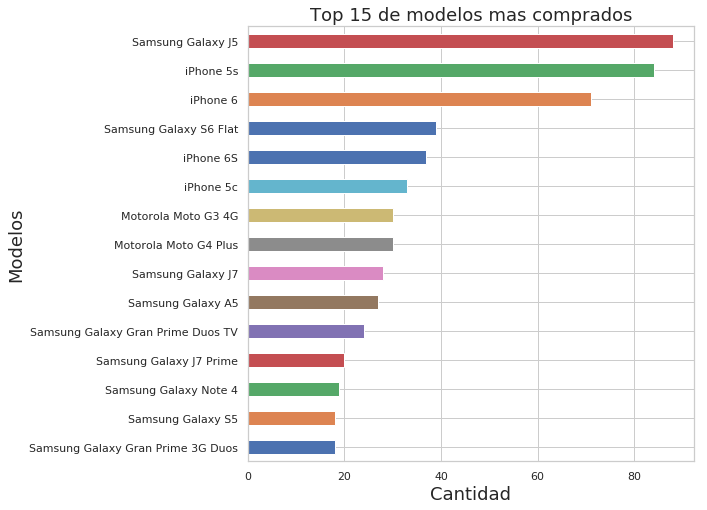

In [19]:
model = conversion['model'].value_counts().head(15).sort_values()
model_plot = model.plot(kind = 'barh', color =sns.color_palette(),figsize = (8,8))
model_plot.set_title('Top 15 de modelos mas comprados',fontsize = 18)
model_plot.set_xlabel('Cantidad',fontsize = 18)
model_plot.set_ylabel('Modelos',fontsize = 18);

In [20]:
galaxy_j5 = conversion[conversion['model'] == 'Samsung Galaxy J5']
galaxy_j5 = galaxy_j5[['storage','condition']]
galaxy_j5 = pd.DataFrame(galaxy_j5.groupby('storage')['condition'].value_counts())
galaxy_j5 = galaxy_j5.rename(columns = {'condition':'cantidad'})
galaxy_j5 = galaxy_j5.reset_index()
galaxy_j5 = galaxy_j5.rename(columns = {'storage':'capacidad'})
galaxy_j5 = galaxy_j5.pivot('capacidad','condition','cantidad')
galaxy_j5

condition,Bom,Excelente,Muito Bom
capacidad,,,
16GB,54.0,7.0,26.0
8GB,1.0,NaN,NaN


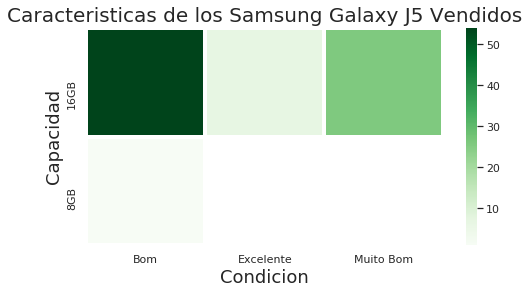

In [21]:
plt.figure(figsize = (8,4))
ax = sns.heatmap(galaxy_j5,linewidth = 3, cmap = 'Greens')
ax.set_title('Caracteristicas de los Samsung Galaxy J5 Vendidos',Fontsize = 20)
ax.set_ylabel('Capacidad',Fontsize = 18)
ax.set_xlabel('Condicion',fontsize = 18);

In [22]:
conversion['person'].value_counts().mean() 

1.6368715083798884

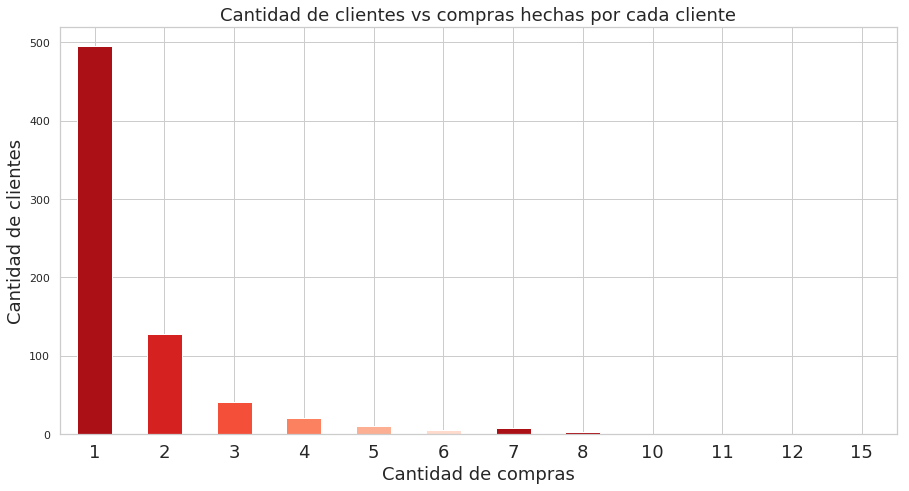

In [23]:
cantidad_plot = conversion['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color=sns.color_palette('Reds_r'),  figsize=(15,7.5) ) # con normalize = True en value_counts se podria mostrar en % 
cantidad_plot.set_title('Cantidad de clientes vs compras hechas por cada cliente',fontsize = 18)
cantidad_plot.set_xlabel('Cantidad de compras',fontsize = 18)
cantidad_plot.set_ylabel('Cantidad de clientes',fontsize = 18);
cantidad_plot.set_xticklabels(cantidad_plot.get_xticklabels(), rotation = 0, fontsize = 18);

In [24]:
dias = conversion['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       184
Tuesday      215
Wednesday    189
Thursday     200
Friday       175
Saturday     106
Sunday       103
Name: timestamp, dtype: int64

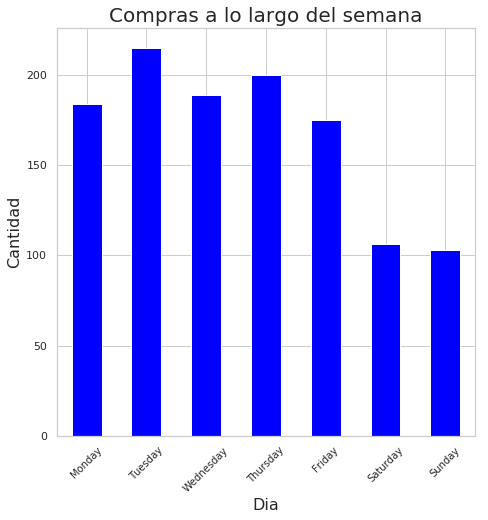

In [25]:
g = dias.plot(kind = 'bar',color='blue',figsize = (7.5,7.5))
g.set_title('Compras a lo largo del semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

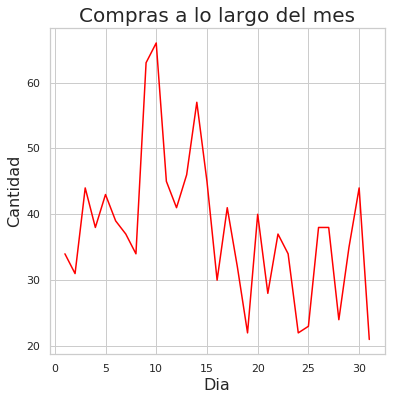

In [26]:
compras = conversion['timestamp'].dt.day.value_counts().sort_index()#este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
g = compras.plot(color='red',figsize = (6,6))
g.set_title('Compras a lo largo del mes',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

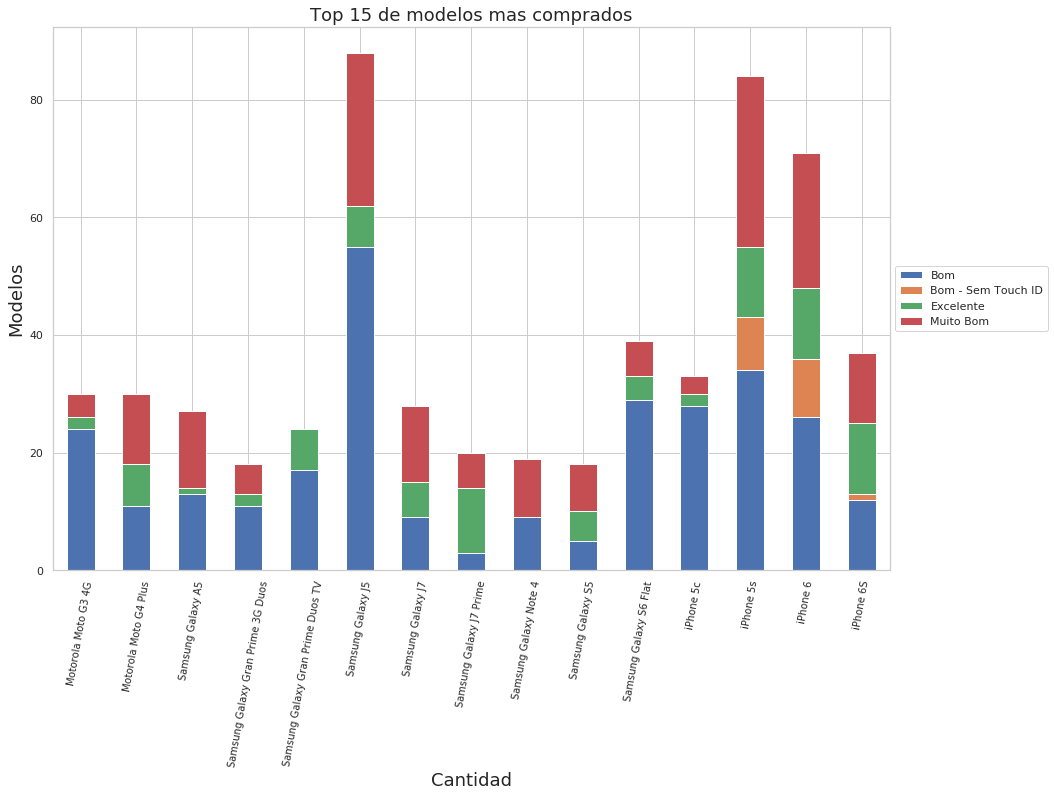

In [114]:
modelos_mas_vendidos = model['model'].value_counts().sort_values(ascending = False).head(15).index

model_ = conversion.loc[:,['model','condition']]
model_ = model_.loc[model['model'].isin(modelos_mas_vendidos)] 
model_2 = model_con_condition.groupby(['model','condition']).agg({'condition':'count'}).unstack()
model_2.columns = model_2.columns.droplevel(0)
model_2.fillna(0, inplace = True)

model_plot = model_2.plot.bar(stacked = True, color =sns.color_palette(),figsize = (15,10))
model_plot.set_title('Top 15 de modelos mas comprados',fontsize = 18)
model_plot.set_xlabel('Cantidad',fontsize = 18)
model_plot.set_ylabel('Modelos',fontsize = 18)
model_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
model_plot.set_xticklabels(model_plot.get_xticklabels(), rotation = 80, fontsize = 10);